Data Preprocessing(데이터 전처리)
- 데이터 분석 용이하게 고치는 모든 작업(전체프로젝트의 8-90%)
- 데이터 전처리 기법 : scaling, sampling, dimensionality reduction, categorical variable to numeric variable

Scaling 
- 변수의 크기를 일정하게 맞춰주는 작업
(변수크기가 너무작거나 큰경우 결과에 영향력 미치는 정도가 일정하지않을수있기때문)

Min-Max Scaling 
- 범위가 0~1 사이로 변경됨 (전체적인 수치가 '1'을 기준으로 비율이 조정됨)
- 공식 :  데이터셋X - Min(데이터샘플x) / (Max(x)-Min(x))

Standard Scaling
- 데이터의 평균 : 0 (범위 : -1 ~ 1 )
- 표준편차가 1이 되도록 스케일링함
- 공식 : z = 데이터샘플x - 데이터평균 / 데이터표준편차

Sampling
- 샘플링하는이유 : 클래수 불균형문제 해결 위함
- 종류 : 적은클래스수 증가시키는 oversampling / 많은클래스수 감소시키는 undersampling

Random Over Under Sampling

SMOTE Synthetic Minority Oversampling Technique
- 임의 over, under 샘플링의 데이터중복으로인한 문제 해결 방법
- 수가적은 클래스의 점을 하나 선택해 k개의 가까운 데이터샘플찾고 그사이에 새로운점을 생성하는 방식
- 테스트해보기위해 전복데이터셋 사용

In [1]:
# 필요한 패키지들을 모두 불러온다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
from os.path import join

In [2]:
abalone_path = join('.','abalone.txt')
column_path = join('.','abalone_attributes.txt')

In [3]:
abalone_columns = list()
for line in open(column_path):
  abalone_columns.append(line.strip())

abalone_columns

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

In [4]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
# 위의 데이터 중 성별만 라벨column으로 뽑기
label = data['Sex']
# 성별 column가져왔으니 이제 필요없어짐, 그래서 지움
del data['Sex']

In [6]:
# 전체 컬럼에 대한 요약 정보
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [8]:
#Scaling

#data = (data - np.min(data)) / (np.max(data) - np.min(data))
#       데이터셋X - Min(데이터샘플x) / (Max(x)-Min(x))
# 이 공식 대신  < MinMaxScaler > 불러내서 쓰면 됨
# MinMaxScaler : 최댓값과 최솟값을 0~1 사이로 값을 맞추는것

#data

In [9]:
from sklearn.preprocessing import MinMaxScaler  # .preprocessing : 데이터전처리와 관련된것들 들어있음
mMscaler = MinMaxScaler() # mMscaler : MinMaxScaler() 이용하기위한 변수
# fit() - 데이터를 특정한 알고리즘에 붙일때 사용
# mMscaler.fit(data)
# transfrom() : fit() 하고 다음으로 transform() 해줘야함
# mScaled_data = mMscaler.transform(data)

mScaled_data = mMscaler.fit_transform(data)   # fit + transform 을 한번에 해주는 함수
mScaled_data

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.34298881, 0.29347285,
        0.32142857],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.49506254, 0.49177877,
        0.39285714]])

In [10]:
# 위의 넘파의 데이터를 보기편하게 pandas에 있는 dataFrame으로 바꿔주기

mScaled_data = pd.DataFrame(mScaled_data, columns = data.columns) # numpy 배열의 mSaled_Data가 DataFrame배열로 바뀜
mScaled_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429


Standard Scaling

데이터의 평균 : 0 (범위 : -1 ~ 1 )
표준편차가 1이 되도록 스케일링함
공식 : z = 데이터샘플x - 데이터평균 / 데이터표준편차

In [11]:
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()

sdscaled_data = sdscaler.fit_transform(data)  # 이 수식 활용하기!

In [12]:
sdscaled_data = pd.DataFrame(sdscaled_data, columns=data.columns) # 넘파이배열을 dataFrame으로 바꿔주기
sdscaled_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013
...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.289624
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


Sampling

샘플링하는이유 : 클래수 불균형문제 해결 위함
종류 : 적은클래스수 증가시키는 oversampling (일반적으로 더 많음)
/ 클래스의 수가 많을경우 감소시키는 undersampling

In [14]:
# Samlping

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

 # 가장 쉽게 샘플링하는 방법은 임의(Random)로 데이터를 선택,복제,제거하는 방식이다 (문제를 예측하고 사용함)
ros = RandomOverSampler()  # 랜덤으로 잡아서 늘려버리는것 ) 문제: 데이터자체가 과접합될수있음(한쪽데이터로 편향될수있음)
rus = RandomUnderSampler()  # 랜덤으로 잡아서 없애버리는것 ) 문제 : 데이터셋이가지고잇는 정보자체의 손실이 생길수있음

In [15]:
oversampled_data, oversampled_label = ros.fit_resample(data, label)
undersampled_data, undersampled_label = rus.fit_resample(data, label)

# numpy배열은 보기 불편하니 DataFrame으로 바꿔준다
oversampled_data = pd.DataFrame(oversampled_data, columns=data.columns)
undersampled_data = pd.DataFrame(undersampled_data, columns=data.columns)

In [16]:
print('원본 데이터의 클래스 비율: \n{}'.format(pd.get_dummies(label).sum())) 
# get_dummies의 역할 : label 안에있는 가짓수를 보여준다, 일반샘플 보는거

print('Oversample 데이터의 클래스 비율: \n{}'.format(pd.get_dummies(oversampled_label).sum()))  
# oversample보는것, 원본데이터에서 M 수가 가장 컸으므로, 1528에 맞춤
# oversample은 나중에 문제가 될수 있음(데이터가 편향되는 결과, 리스크 큼)
 
print('Undersample 데이터의 클래스 비율: \n{}'.format(pd.get_dummies(undersampled_label).sum())) 
# undersample보는것, 원본데이터에서 F가 가장 작았으므로 1307에 맞춤

원본 데이터의 클래스 비율: 
F    1307
I    1342
M    1528
dtype: int64
Oversample 데이터의 클래스 비율: 
F    1528
I    1528
M    1528
dtype: int64
Undersample 데이터의 클래스 비율: 
F    1307
I    1307
M    1307
dtype: int64


SMOTE Synthetic Minority Oversampling Technique

임의 over, under 샘플링의 데이터중복으로인한 문제 해결 방법,
수가적은 클래스의 점을 하나 선택해 k개의 가까운 데이터샘플찾고 그사이에 새로운점을 생성하는 방식
테스트해보기위해 전복데이터셋 사용


In [ ]:
from sklearn.datasets import make_classification   # 분류를 해주는 패키지 = make_classification(샘플데이터를 만들어줌)
data, label =make_classification(n_samples=1000,   # 1000개의 샘플 만든다, 여기서 나오는게 첫번째가 data, 두번째가 label 값들이다
                    n_features=2,                  # 안에들어가는 내용은 2가지이다
                    n_redundant=0,
                    n_informative=2,               # 값들 중 튀는것들이 얼마나있을것인지 지정
                    n_repeated=0,                  # 몇번이나 반복할건지
                    n_classes=3,                    
                    n_clusters_per_class=1,        
                    weights=[0.05,0.15,0.8],       # 가중치 주는것
                    class_sep=0.8,
                    random_state=2019)

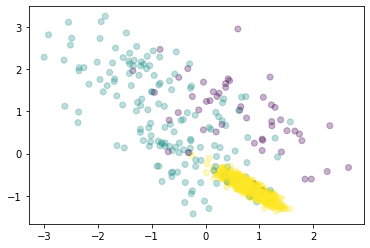

In [ ]:
fig = plt.Figure(figsize=(12,6))   # 샘플을 그리기위한 그림판 만들기, fig=그림판을 사용하기위한 변수

# scatter()이용해서 점을 찍기
# 0번째데이터 = x좌표, 1번째데이터 = y좌표, c=label : 라벨별로 색상 다르게, alpha: 겹치는값까지 연하게 보이게
plt.scatter(data[:,0],data[:,1],c=label,alpha=0.3) 

In [ ]:
from imblearn.over_sampling import SMOTE   
smote = SMOTE()

In [ ]:
smoted_data, smoted_label = smote.fit_resample(data, label)

print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
print('\nSOMTE 결과 \n{}'.format(pd.get_dummies(smoted_label).sum()))  # 원본데이터의 가장 큰값인 793으로 oversampling 함

원본 데이터의 클래스 비율 
0     53
1    154
2    793
dtype: int64

SOMTE 결과 
0    793
1    793
2    793
dtype: int64


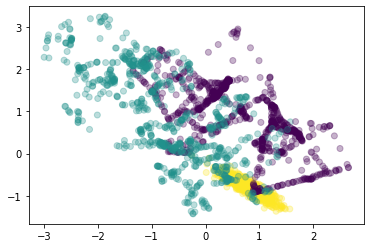

In [ ]:
fig = plt.Figure(figsize=(12,6))
plt.scatter(smoted_data[:,0],smoted_data[:,1],c=smoted_label,alpha=0.3)
# 떨어진 값들을 연결시켜줌

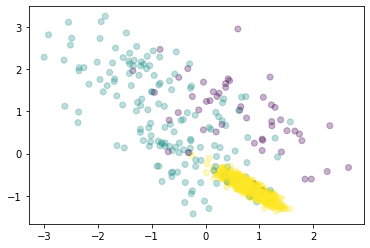

In [ ]:
fig = plt.Figure(figsize=(12,6))    # 위의 smoted 알고리즘과 비교하기(이게 원본 데이터), 전체 점 개수는 같다
plt.scatter(data[:,0],data[:,1],c=label,alpha=0.3)

In [ ]:
# 차원의 축소

from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
data = digits.data
label = digits.target

In [ ]:
data.shape

(1797, 64)

In [ ]:
data[0].reshape(8,8)   # reshape : 64개를 2차원 8*8로 모양을 재조정해주기

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
label[0]

0

Label: 0


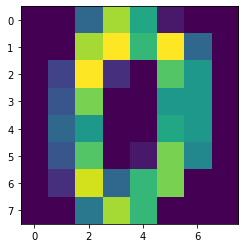

In [ ]:
plt.imshow(data[0].reshape((8,8)))   #imshow : 이미지 보여주라는 명령어
print('Label: {}'.format(label[0]))

In [ ]:
from sklearn.decomposition import PCA  # 주 성분을 확인해보기
pca = PCA(n_components=2) # pca의 전체 component개수는 2다

In [ ]:
new_data = pca.fit_transform(data)

In [ ]:
print('원본 데이터의 차원 \n{}'.format(data.shape))
print('PCA를 거친 데이터의 차원 \n{}'.format(new_data.shape))

원본 데이터의 차원 
(1797, 64)
PCA를 거친 데이터의 차원 
(1797, 2)


In [ ]:
data[0]  # 변수하나하나가 특정값(64)개 가짐

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
new_data[0]  # array([-1.25946421, 21.27491395])<- 이 두개의 차원으로 위의 data[0] 결과값을 압축해서 표현함

array([-1.25946421, 21.27491395])

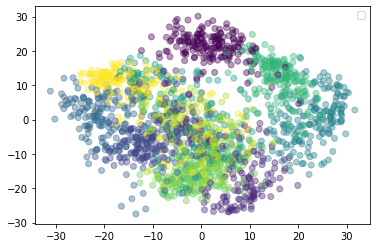

In [ ]:
plt.scatter(new_data[:,0],new_data[:,1],c=label,alpha=0.4)  # 첫번째0 = x좌표, label = 컬러값 매김
plt.legend()

Encoding (수치화방법)
- Label Encoding : n개의 범주형데이터를 0~n-1 개의 연속적인 수치데이터로 표현함, 더쉽게 사용할수있음, ex) 사망자는 0, 생존자는 1로 표현
- One-hot Encoding : n개의 범주형데이터를 n개의 비트벡터로 표현함, 서로다른범주에 대해서는 벡터내적을 취했을때 내적이 0이 나게 되며 서로 다른 범주는 독립적이라는것을 표현하게함, 문장같은거 구별할때 더많이 사용

In [ ]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)

In [ ]:
label = data['Sex']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [ ]:
label_encoded_label = le.fit_transform(label)
label_encoded_label

array([2, 2, 0, ..., 2, 0, 2])

In [ ]:
label

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False) #True

one_hot_encoded = ohe.fit_transform(label.values.reshape((-1,1)))

In [ ]:
one_hot_encoded

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])